In [117]:
pip install Tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [118]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [119]:
import pandas as pd 
import numpy as np 
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 
sns.set(color_codes=True)
from numpy import loadtxt 
from keras.models import Sequential 
from keras.layers import Dense
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
import random
import tensorflow
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

In [120]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [121]:
df = pd.read_csv("creditcard_2023.csv") 

In [122]:
df.head(10) 


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [123]:
df.dtypes 

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [124]:
df = df.drop(columns=['id'])


In [125]:
df.shape 


(568630, 30)

In [126]:
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (1, 30)


In [127]:
df.count()

V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64

In [128]:
df = df.drop_duplicates() 
df.head(10) 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,0.451788,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,0.437518,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,0.453469,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [129]:
df.count() 

V1        568629
V2        568629
V3        568629
V4        568629
V5        568629
V6        568629
V7        568629
V8        568629
V9        568629
V10       568629
V11       568629
V12       568629
V13       568629
V14       568629
V15       568629
V16       568629
V17       568629
V18       568629
V19       568629
V20       568629
V21       568629
V22       568629
V23       568629
V24       568629
V25       568629
V26       568629
V27       568629
V28       568629
Amount    568629
Class     568629
dtype: int64

In [130]:
print(df.isnull().sum()) 


V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [131]:
fraudulent = df[df['Class'] == 1]
non_fraudulent= df[df['Class'] == 0]


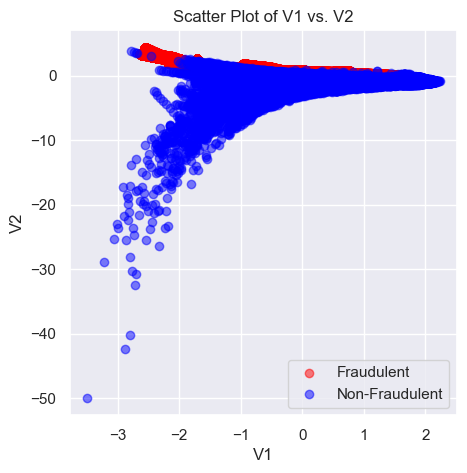

In [132]:
#  Relationships between pairs for both fraudulent and non-fraudulent 
plt.figure(figsize=(5, 5))
plt.scatter(fraudulent['V1'], fraudulent['V2'], c='red', label='Fraudulent', alpha=0.5)
plt.scatter(non_fraudulent['V1'], non_fraudulent['V2'], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.title('Scatter Plot of V1 vs. V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.grid(True)
plt.show()


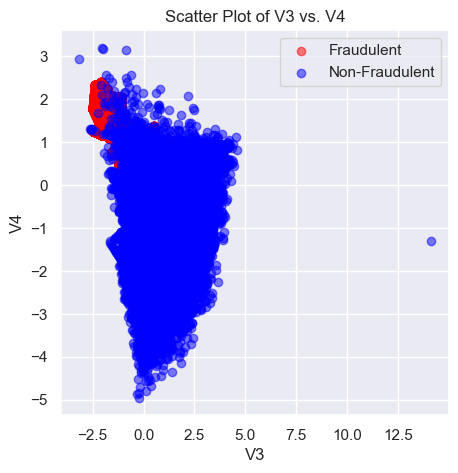

In [133]:
plt.figure(figsize=(5, 5))
plt.scatter(fraudulent['V3'], fraudulent['V4'], c='red', label='Fraudulent', alpha=0.5)
plt.scatter(non_fraudulent['V3'], non_fraudulent['V4'], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.title('Scatter Plot of V3 vs. V4')
plt.xlabel('V3')
plt.ylabel('V4')
plt.legend()
plt.grid(True)
plt.show()

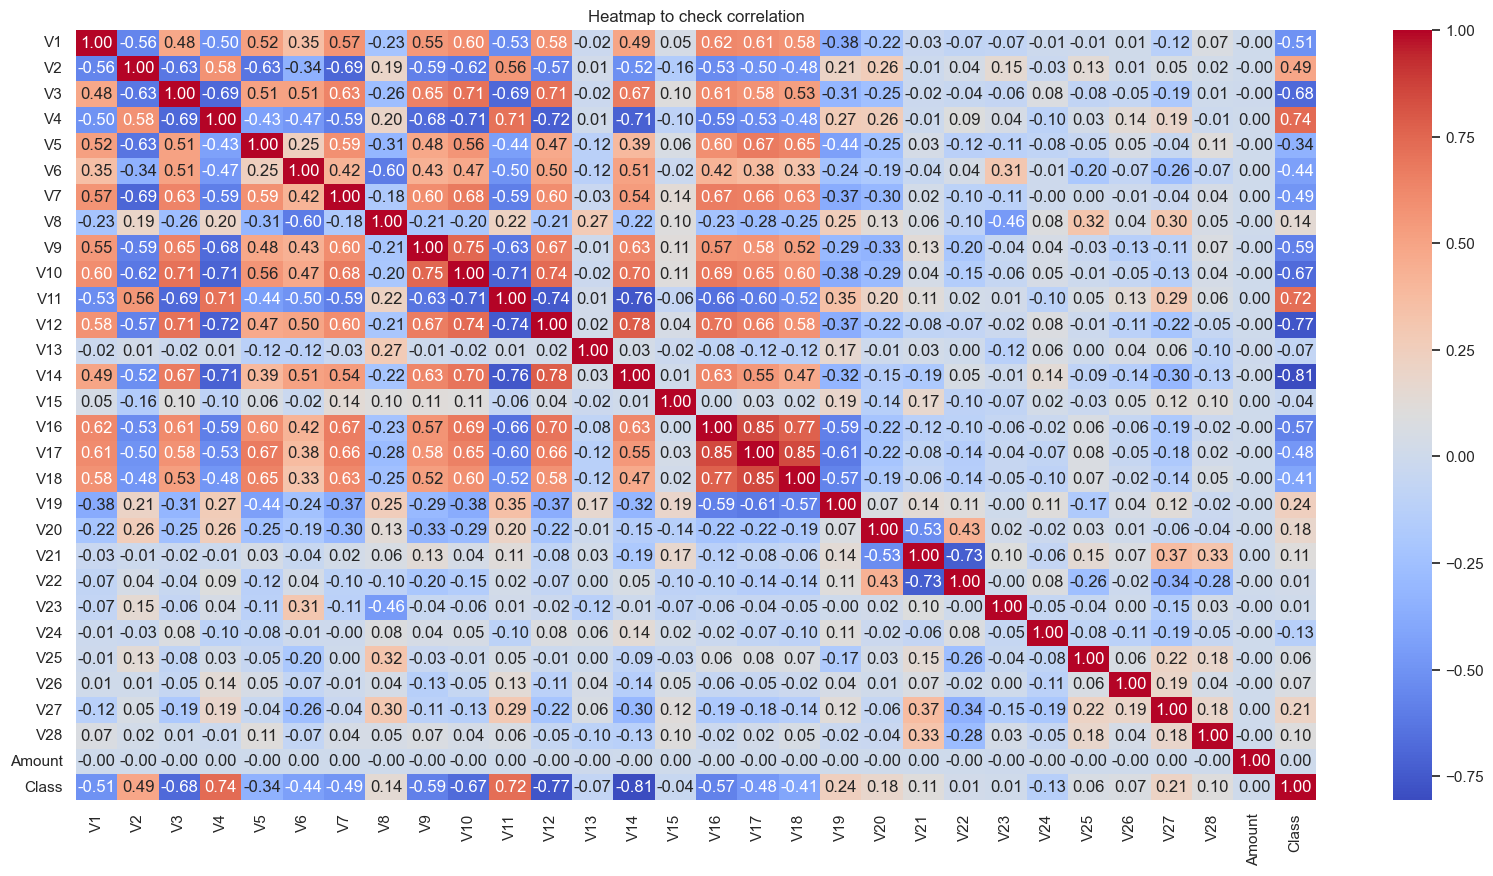

In [134]:
# heatmap to visualize the pairwise correlations between the features
plt.figure(figsize=(20,10)) 
c= df.corr() 
sns.heatmap(c,cmap="coolwarm",annot=True, fmt=".2f") 
plt.title('Heatmap to check correlation')
plt.show()

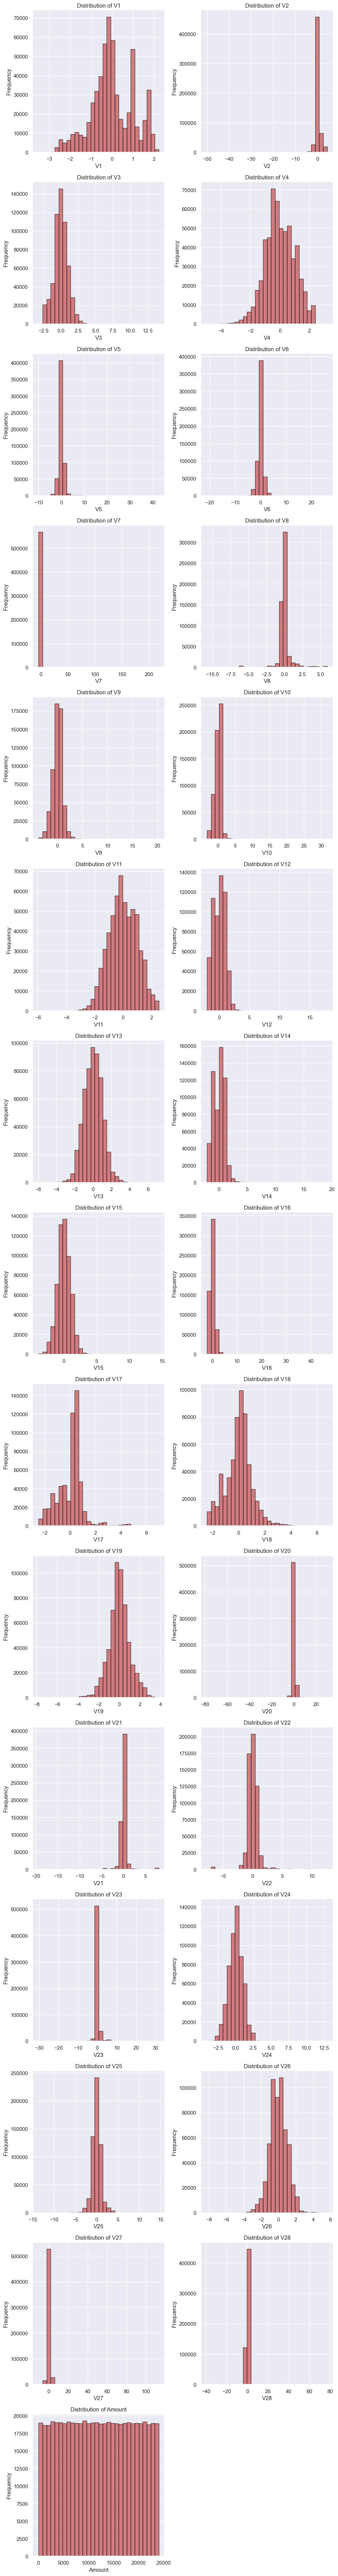

In [135]:


# Extracting the numerical features, excluding the 'Class' column
numerical_features = df.drop(columns=['Class'])

# number of subplots based on the number of numerical features
num_features = numerical_features.shape[1]
num_rows = (num_features - 1) // 2 + 1  # Number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))


axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features.columns):
    axes[i].hist(numerical_features[feature], bins=30, alpha=0.7, edgecolor='black', color='r',)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots 
if num_features % 2 != 0:
    fig.delaxes(axes[num_features])

plt.tight_layout()
plt.show()


In [113]:

# drop column 'Class'
numerical_features = df.drop(columns=['Class'])

# new empty DataFrame to store the normalized features
normalized_features = pd.DataFrame()

# Min-Max scaling to each column separately
for column in numerical_features.columns:
    scaled_column = minmax_scale(numerical_features[column])
    normalized_features[column] = scaled_column

# rows of the DataFrame with Min-Max scaled features
print(normalized_features.head())



         V1        V2        V3        V4        V5        V6        V7  \
0  0.565091  0.911068  0.328143  0.597037  0.191428  0.462018  0.021919   
1  0.782703  0.913159  0.216170  0.554606  0.194228  0.455582  0.021412   
2  0.565157  0.902238  0.283790  0.551131  0.190372  0.476540  0.022929   
3  0.584043  0.910345  0.284848  0.473588  0.193703  0.470699  0.021915   
4  0.574494  0.916671  0.272150  0.552320  0.190981  0.457739  0.022548   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.635760  0.186457  0.108955  ...  0.724297  0.701574  0.390449  0.486438   
1  0.635574  0.170651  0.105862  ...  0.721287  0.698503  0.350024  0.489894   
2  0.637820  0.145310  0.110474  ...  0.726801  0.705416  0.414277  0.503854   
3  0.639641  0.147624  0.107164  ...  0.719951  0.700250  0.377889  0.485160   
4  0.630815  0.199894  0.118424  ...  0.725742  0.701704  0.415594  0.486005   

        V24       V25       V26       V27       V28    Amount  
0  0

In [136]:
from sklearn.model_selection import train_test_split 

#  'Class' is the target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split the data into training and testing, with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [ ]:
# Build neural network in Keras
model = Sequential() 
model.add(Dense(12, input_dim=29, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 